### Final Team Project: Predicting Employee Turnover
#### Authors: Lai Ieng Chan, Kyle Esteban Dalope, Mendelina Renee Lopez

In [30]:
# Importing all packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# For Decision Trees
import statsmodels.tools.tools as stattools 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# For Regression model
from sklearn.metrics import mean_absolute_error

# For Partitioning the data
from sklearn.model_selection import train_test_split
import random

# For Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

### Data Importing and Preprocessing

In [25]:
EmployeeData = pd.read_csv("C:\\Users\\annie\\downloads\\Employee Data.csv")
EmployeeData.head(5)

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
0,Female,High,Rare,Sales,Engineering,Medium,Near,Yes
1,Male,Low,Frequent,Sales,Engineering,Low,Near,Yes
2,Male,Medium,Rare,R&D,Other,Medium,Far,No
3,Female,Low,Frequent,R&D,Engineering,Medium,Far,Yes
4,Male,Medium,Rare,R&D,Medical,Medium,Far,No


In [26]:
# Dataframe Dimension
EmployeeData.shape

(100, 8)

In [27]:
# Descriptive statistics on the dataset
EmployeeData.describe()

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
count,100,100,100,100,100,100,100,100
unique,2,3,3,2,5,3,2,2
top,Male,High,Rare,R&D,Engineering,High,Near,No
freq,65,47,76,71,44,42,67,82


In [28]:
# Checking the data type for each variable
EmployeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           100 non-null    object
 1   Satisfaction     100 non-null    object
 2   Business Travel  100 non-null    object
 3   Department       100 non-null    object
 4   EducationField   100 non-null    object
 5   Salary           100 non-null    object
 6   Home-Office      100 non-null    object
 7   Attrition        100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


### Exploratory Data Analysis

#### Variable: Employee Satisfaction

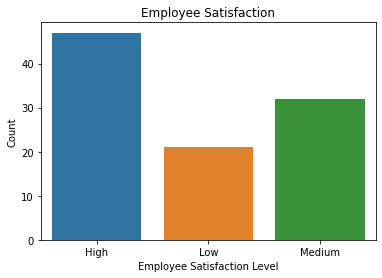

In [31]:
# Bar graph of employee satisfaction
sns.countplot(x='Satisfaction',data=EmployeeData)
plt.xlabel("Employee Satisfaction Level")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

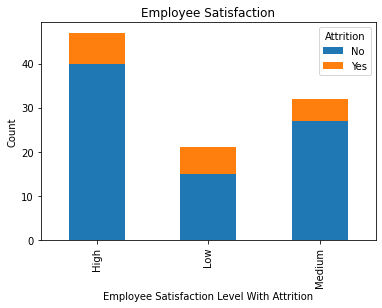

In [32]:
# Bar graph of employee satisfaction with overlay of attrition
crosstab2 = pd.crosstab(EmployeeData['Satisfaction'],EmployeeData['Attrition'])
crosstab2.plot(kind='bar',stacked=True)
plt.xlabel("Employee Satisfaction Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

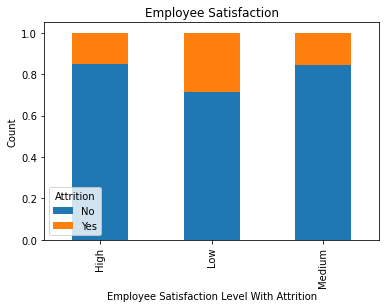

In [33]:
# Normalized Bar graph of employee satisfaction with overlay of attrition
ctn2 = crosstab2.div(crosstab2.sum(1),axis=0)
ctn2.plot(kind='bar',stacked=True)
plt.xlabel("Employee Satisfaction Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

**Normalizing employee satisfaction by our taget (attrition) helps us conclude the preliminary findings that the lower the employee satisfaction rate, the higher the attrition rate. It is also important to note that, there are more employees who have high satisfaction level to the company.**

#### Vairable: Employee Salary

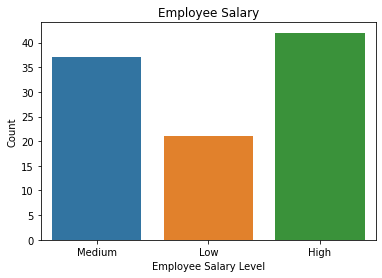

In [34]:
# Bar graph of employee salary
sns.countplot(x='Salary',data=EmployeeData)
plt.xlabel("Employee Salary Level")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

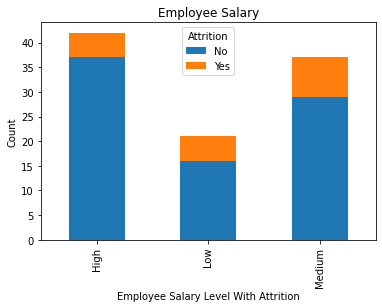

In [35]:
# Bar graph of employee salary with overlay of attrition
crosstab6 = pd.crosstab(EmployeeData['Salary'],EmployeeData['Attrition'])
crosstab6.plot(kind='bar',stacked=True)
plt.xlabel("Employee Salary Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

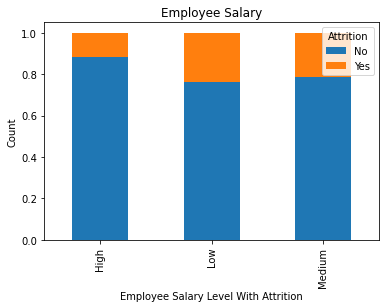

In [36]:
# Normalized Bar graph of employee salary with overlay of attrition
ctn6 = crosstab6.div(crosstab6.sum(1),axis=0)
ctn6.plot(kind='bar',stacked=True)
plt.xlabel("Employee Salary Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

**Normalizing employee salary level by our taget (attrition) helps us conclude the preliminary findings that the lower the employee salary level, the higher the attrition rate. It is also important to note that, there are more employees who are making high-leveled salary in this company.** 

#### Variable: Home-Office

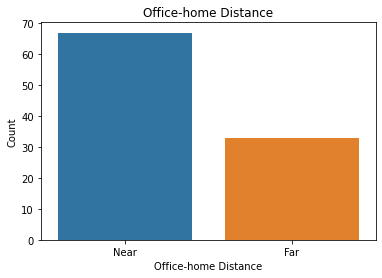

In [37]:
# Bar graph of office-home distance
sns.countplot(x='Home-Office',data=EmployeeData)
plt.xlabel("Office-home Distance")
plt.ylabel("Count")
plt.title("Office-home Distance")
plt.show()

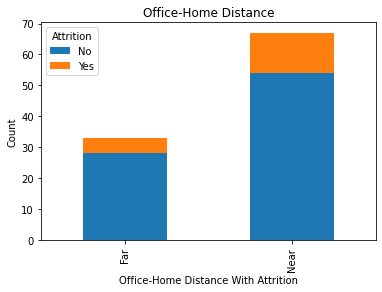

In [38]:
# Bar graph of office-home distance with overlay of attrition
crosstab7 = pd.crosstab(EmployeeData['Home-Office'],EmployeeData['Attrition'])
crosstab7.plot(kind='bar',stacked=True)
plt.xlabel("Office-Home Distance With Attrition")
plt.ylabel("Count")
plt.title("Office-Home Distance")
plt.show()

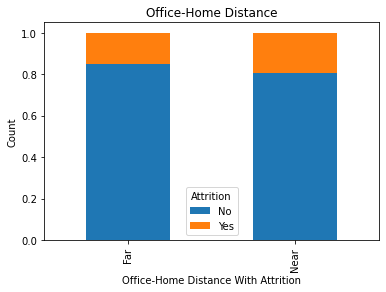

In [39]:
# Normalized Bar graph of office-home distance with overlay of attrition
ctn7 = crosstab7.div(crosstab7.sum(1),axis=0)
ctn7.plot(kind='bar',stacked=True)
plt.xlabel("Office-Home Distance With Attrition")
plt.ylabel("Count")
plt.title("Office-Home Distance")
plt.show()

### Data Preparation & Cleaning

#### Checking for missing variables

In [14]:
# Checking for missing values
EmployeeData.isna().sum()

Gender             0
Satisfaction       0
Business Travel    0
Department         0
EducationField     0
Salary             0
Home-Office        0
Attrition          0
dtype: int64

**We can see that there is no missing values in this dataset.**

#### Converting categorical variable to dummy variables

In [15]:
# Creating a dataframe for the data we will be working on
data = pd.DataFrame(EmployeeData)

# Converting categorical variables into dummy variables for the ML models
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head(5)

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
0,0,0,2,1,0,2,1,1
1,1,1,0,1,0,1,1,1
2,1,2,2,0,3,2,0,0
3,0,1,0,0,0,2,0,1
4,1,2,2,0,2,2,0,0


#### Splitting the dataset to training set and test set

In [16]:
# Subset the predictor variables to X
X = data[['Satisfaction','Salary','Home-Office']]

# Subset the response variable to y
y = data[['Attrition']]

In [17]:
# Parition the data set with the test size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Balancing the target variable (Attrition) in the Training set

<AxesSubplot:xlabel='Partition'>

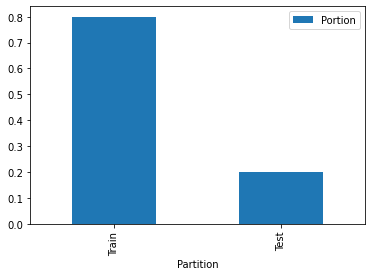

In [23]:
# Collect proportion values in a dataframe
df = pd.DataFrame({'Partition':['Train','Test'],
                  'Portion':[(X_train.shape[0]/X.shape[0]),
                            (X_test.shape[0]/X.shape[0])]
                  })

# Create barplot
df.set_index('Partition').plot(kind='bar')

In [19]:
# Idnentify the total number of records in the training dataset
print('The total number of records in the training dataset is', y_train.shape[0])

# Identify how many records in the training dataset that has attrition = yes
print('There are', y_train.loc[y_train['Attrition']==1].shape[0], 
      'records in the training dataset that have a attrition class of Yes.')

The total number of records in the training dataset is 80
There are 14 records in the training dataset that have a attrition class of Yes.


**That is about 17.5% of the training dataset with Attrition have the 'Yes' response value. To provide the classification algorithms with a rich selection of records for each category, we will resample the training dataset in order to have 20% of the rebalanced data set have 'yes' attrition values.**\
<br>
**To have 20% of the rebalanced dataset have true churn values, we have p=0.2, records=80, rare=14. By substituting the unknowns into the formula 'Rare + x = p(records + x)', we get x=2.5. That is we need to resample 3 records whose Churn response is 'True' and add them to our training dataset.**\

In [20]:
# Subsetting the records which we want to resample
to_resample = y_train.loc[y_train['Attrition'] == 1]

# sample() draws records at random form, replace 'Yes' specifies to sample with replacement
our_resample = to_resample.sample(n = 3, replace = True)

# Add the resampled records to the original dataset
y_train_rebal = pd.concat([y_train, our_resample])

# Confirming that 20% of the records in the rebalanced dataset have 'True' as the Churn values
y_train_rebal['Attrition'].value_counts()

0    66
1    17
Name: Attrition, dtype: int64

**Since 17/(66+17) is ~20%, we can confirm that 20% of the records in the rebalanced data set have 'Yes' in attrition values.**

### Modeling

#### CART Algorithm

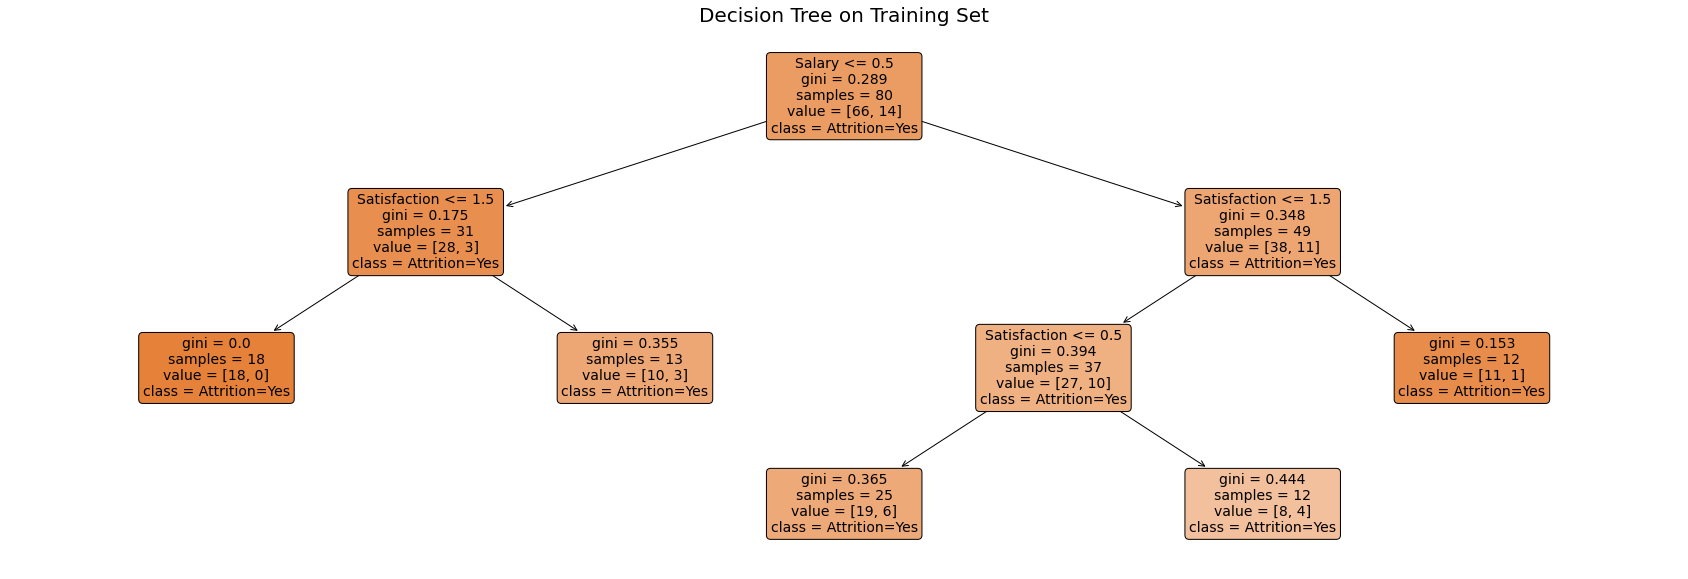

In [22]:
# Train CART model
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X_train, y_train)

# Specify the names of each column of X and y
X_names = ['Satisfaction', 'Salary', 'Home-Office']
y_names = ['Attrition=Yes', 'Attrition=No']

# Obtain tree structure with labeles
plt.figure(figsize=(30,10))
cart01_viz = tree.plot_tree(cart01, feature_names = X_names, class_names = y_names,
                            rounded = True, filled = True, fontsize=14)
plt.title("Decision Tree on Training Set", fontsize=20)
plt.show()

#### C5.0 Algorithm

In [97]:
# C5.0 Algorithm
c50_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(X_train, y_train)

### Notes/May Not include

In [54]:
X['EducationField'].value_counts(normalize=True) * 100

0    44.0
2    32.0
1    10.0
3     8.0
4     6.0
Name: EducationField, dtype: float64

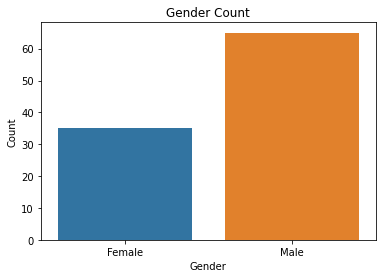

In [12]:
# Bar graph of gender
sns.countplot(x='Gender', data=EmployeeData)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count")
plt.show()

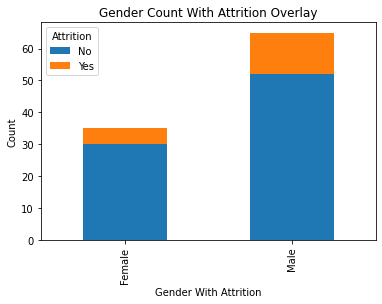

In [13]:
# Bar graph of gender with overlay of attrition
crosstab1 = pd.crosstab(EmployeeData['Gender'],EmployeeData['Attrition'])
crosstab1.plot(kind='bar',stacked=True)
plt.xlabel("Gender With Attrition")
plt.ylabel("Count")
plt.title("Gender Count With Attrition Overlay")
plt.show()

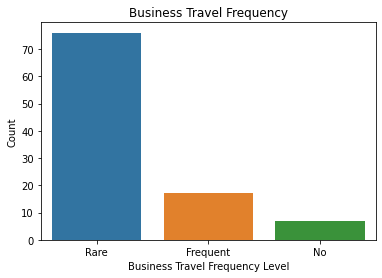

In [21]:
# Bar graph of business travel frequency
sns.countplot(x='Business Travel',data=EmployeeData)
plt.xlabel("Business Travel Frequency Level")
plt.ylabel("Count")
plt.title("Business Travel Frequency")
plt.show()

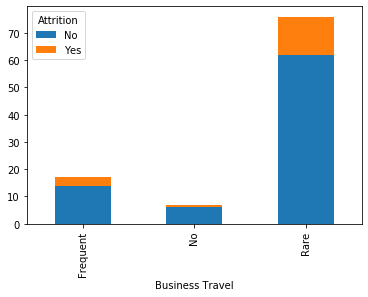

In [49]:
# Bar graph of employee satisfaction with overlay of attrition
crosstab3 = pd.crosstab(EmployeeData['Business Travel'],EmployeeData['Attrition'])
crosstab3.plot(kind='bar',stacked=True)

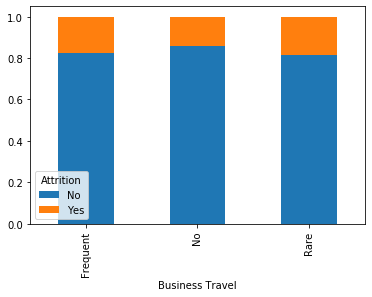

In [50]:
ctn3 = crosstab3.div(crosstab3.sum(1),axis=0)
ctn3.plot(kind='bar',stacked=True)

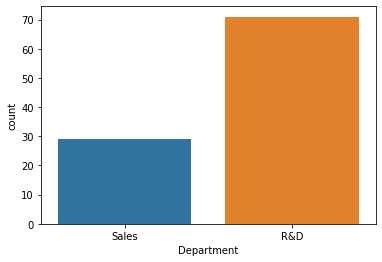

In [51]:
sns.countplot(x='Department',data=EmployeeData)

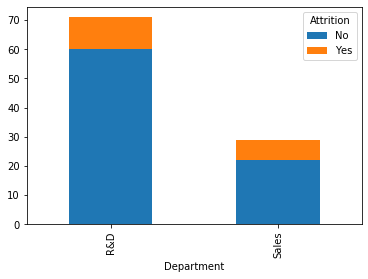

In [52]:
crosstab4 = pd.crosstab(EmployeeData['Department'],EmployeeData['Attrition'])
crosstab4.plot(kind='bar',stacked=True)

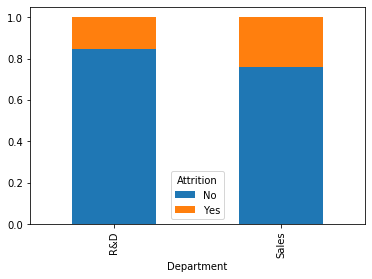

In [53]:
ctn4 = crosstab4.div(crosstab4.sum(1),axis=0)
ctn4.plot(kind='bar',stacked=True)

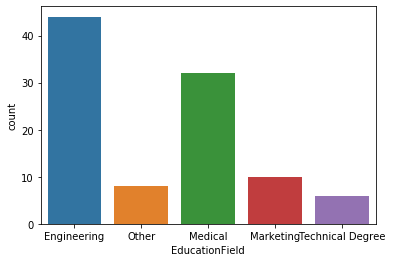

In [54]:
sns.countplot(x='EducationField',data=EmployeeData)

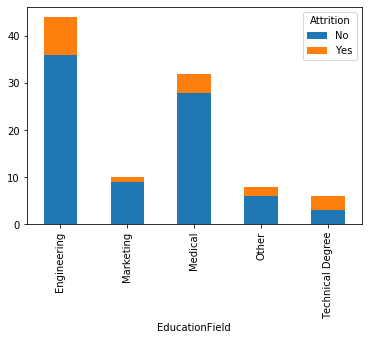

In [55]:
crosstab5 = pd.crosstab(EmployeeData['EducationField'],EmployeeData['Attrition'])
crosstab5.plot(kind='bar',stacked=True)

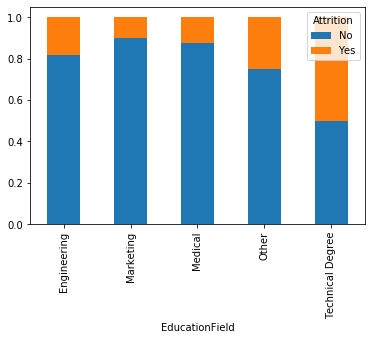

In [56]:
ctn5 = crosstab5.div(crosstab5.sum(1),axis=0)
ctn5.plot(kind='bar',stacked=True)

In [ ]:
#### Multicollinearity Analysis
# Identify Multicollinearity
# Subseting the three predictor variables and put them in their own data frame
X = pd.DataFrame(EmployeeData[['Salary', 'Satisfaction', 'Home-Office']])
X = sm.add_constant(X)

# Run the variance_inflation_factor() command as given below to obtain the VIF values
[inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
X_names = ['Cap_Gains_Losses', 'Divorced', 'Married', 'Never-married', 'Separated', 'Widowed']
y_names = ['<=50K', '>50K']

c. Data preparation/cleaning

        1) Missing variables
        
        2) Outliers
        
        3) Correlation Analysis
        
        4) Multicollinearity Analysis (If strong multicollinearity exist, apply PCA)
        
        5) Balancing the train dataset
        
        6) Splitting the data